# Advanced Data Handling and Visualization

In this notebook, we cover missing data handling, filtering, grouping, and multiple visualization types.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data.csv")
df.dtypes


Name          object
Age            int64
Department    object
Salary         int64
Experience     int64
dtype: object

In [2]:
# Introduce missing values artificially for demo
df.loc[2, "Salary"] = np.nan
df.loc[5, "Age"] = np.nan

df.head()


,Name,Age,Department,Salary,Experience
0,Alice,28.0,Engineering,75000.0,3
1,Bob,34.0,Marketing,62000.0,6
2,Charlie,25.0,Engineering,NaN,2
3,David,45.0,HR,68000.0,15
4,Eve,30.0,Marketing,64000.0,5


In [7]:
# Handle missing data by filling with median
df["Salary"] = df["Salary"].fillna(df["Salary"].median())
df["Age"] = df["Age"].fillna(df["Age"].median())

df.isnull().sum()


Name          0
Age           0
Department    0
Salary        0
Experience    0
dtype: int64

In [4]:
# Filter employees with Salary > 65000 and sort by Experience
filtered = df[df["Salary"] > 65000].sort_values("Experience", ascending=False)
filtered


,Name,Age,Department,Salary,Experience
5,Frank,30.0,Engineering,88000.0,20
3,David,45.0,HR,68000.0,15
8,Ivan,38.0,Marketing,66000.0,10
7,Heidi,31.0,Engineering,72000.0,6
0,Alice,28.0,Engineering,75000.0,3
2,Charlie,25.0,Engineering,66000.0,2


In [5]:
# Group by Department: average salary and total experience
grouped = df.groupby("Department").agg({"Salary": "mean", "Experience": "sum"})
grouped


,Salary,Experience
Department,,
Engineering,75250.000000,31
HR,62333.333333,22
Marketing,64000.000000,21


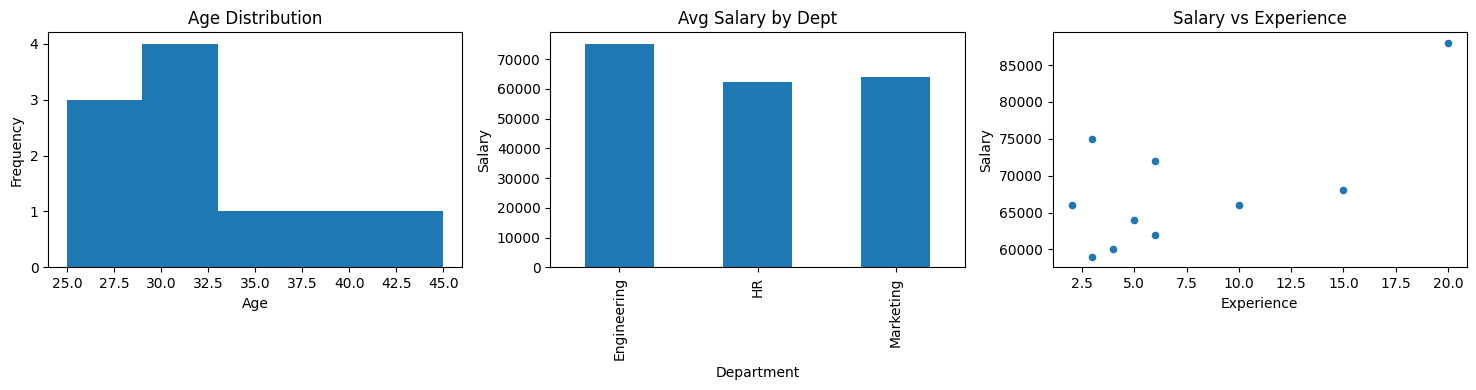

In [6]:
# Multiple plots in one cell
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
df["Age"].plot(kind="hist", bins=5, title="Age Distribution")
plt.xlabel("Age")

plt.subplot(1,3,2)
grouped["Salary"].plot(kind="bar", title="Avg Salary by Dept")
plt.ylabel("Salary")

plt.subplot(1,3,3)
df.plot(kind="scatter", x="Experience", y="Salary", title="Salary vs Experience", ax=plt.gca())

plt.tight_layout()
plt.show()


In [8]:
plt.close()